# Встроенные функции

**callable()** 

для проверки, можно ли вызвать объект как функцию

In [4]:
# функция
def say_hello(name='Гость'):
    print(f'Привет, {name.title()}!')

In [5]:
callable(say_hello)

True

In [6]:
callable(10)

False

In [7]:
print(callable(print))
print(callable(int))
print(callable(list))

True
True
True


**hasattr()**

для проверки существования атрибута в объекте

In [8]:
hasattr([1,2,3],'append')

True

In [9]:
hasattr('hello world', 'upper')

True

In [10]:
hasattr(10, 'reverse')

False

**hash()**

возвращает целое число, представляющее хеш-значение переданного объекта

In [11]:
hash(10)

10

In [12]:
hash('hello')

-6330662035561460520

In [14]:
hash([1,2,3]) # ошибка

TypeError: unhashable type: 'list'

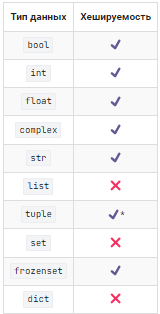

**help()**

справка по функции, модулю или объекту

In [15]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [24]:
print?  # справка для блокнота

SyntaxError: invalid syntax (931804217.py, line 1)

In [26]:
list?

**repr()**

возвращает строку, содержащую формальное (понятное интерпретатору) представление переданного объекта

In [27]:
repr('hello')

"'hello'"

In [28]:
repr(10)

'10'

In [29]:
repr([1,2,3])

'[1, 2, 3]'

In [30]:
from datetime import datetime 
date = datetime(2003,3,8)
print(date)

2003-03-08 00:00:00


In [31]:
repr(date)

'datetime.datetime(2003, 3, 8, 0, 0)'

**eval**

выполняет строку-**выражение**, переданную ей в качестве обязательного аргумента, и возвращает результат выполнения этой строки

In [32]:
eval('1+1')

2

In [34]:
a = eval('[1,2,3]')
print(a)
type(a)

[1, 2, 3]


list

In [35]:
s = 'hi'
eval('print(s)')  # имеет доступ к локальным и глобальным переменным

hi


Имейте в виду, что не все языковые конструкции являются выражениями (expression). Операторами, которые нельзя использовать в качестве выражений, являются, например, while, for, if, def, import, class, raise и т.д.

In [36]:
eval('[i**2 for i in range(1,11) ]') # выражение

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [37]:
eval('print('yes') if 2+2==4 else print('no')') # ошибка

SyntaxError: invalid syntax (3969591704.py, line 1)

In [38]:
# таким образом можно парсить объекты в Python 
s = "['s',1,2,(1,2),dict()]"
eval(s)

['s', 1, 2, (1, 2), {}]

**exec()**

в отличие от eval(), принимает **блок кода** и выполняет его, **возвращая значение None**

In [39]:
exec("print('s')")

s


In [40]:
code_str = '''
x = 5
while x>0:
    x=x-1
    print(x)
'''

In [41]:
exec(code_str)

4
3
2
1
0


In [42]:
code = '''
def func():
    return 100
func()
'''

In [46]:
print(exec(code))  # возвращает None

None


### Функции высшего* порядка map, filter

-* которые принимают или/и возвращают другие функции

In [ ]:
# map(func, iterable)

Функция **map()** выполняет пользовательскую функцию func для каждого элемента последовательности iterable

In [48]:
def my_func(x):
    return x**2

squares = map(my_func, [1,2,3,4,5])  # итерируемый объект
squares # объект map

In [51]:
print(*squares) # итератор дошел до конца и "распаковался"

In [52]:
list(squares) # когда итератор "доходит" до конца, он не возвращается назад

[]

In [54]:
print(*map(lambda x: x**2, (10,20,30)))

100 400 900


In [56]:
# "распаковка" последовательностей

print(*map(lambda x,y,z: [x*100,y*100,z*100], [1,2],[3,4],[5,6,7]))

[100, 300, 500] [200, 400, 600]


In [57]:
# filter(func*, iterable)   *func - функция, возвращающая булевое значение  

In [58]:
def is_five(score):
    if score == 5:
        return True

In [59]:
print(*filter(is_five, [2,4,4,4,3,4,5,2,3,4,5,5]))

5 5 5


При несложной фильтрации вместо аргумента func часто подставляют анонимную функцию, используя в ней стандартные функции или методы, возвращающие bool значения:

- операции сравнения
- оператор вхождения in
- оператор идентичности is
- и т.д.